In [7]:
from pre_process import svo_to_mp4s
import os

raw_dir = './convnert_reference_frame/obj-vid-capture'
outdir = os.path.dirname(raw_dir) + '/mp4s'

fnames = os.listdir(raw_dir)
for fname in fnames:
    f_in = os.path.join(raw_dir, fname)
    basename = os.path.basename(f_in).split('.')[0]
    f_out = os.path.join(outdir, basename)
    svo_to_mp4s(f_in, f_out)

./convnert_reference_frame/obj-vid-capture/HD1080_SN3404_12-48-53.svo
Converting SVO... Use Ctrl-C to interrupt conversion.


OpenCV: FFMPEG: tag 0x3253344d/'M4S2' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x3253344d/'M4S2' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


[==============================] 100.000000%
SVO end has been reached. Exiting now.
The video id is HD1080_SN3404_12
./convnert_reference_frame/obj-vid-capture/HD1080_SN3404_12-53-39.svo
Converting SVO... Use Ctrl-C to interrupt conversion.


OpenCV: FFMPEG: tag 0x3253344d/'M4S2' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x3253344d/'M4S2' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


[==============================] 100.000000%
SVO end has been reached. Exiting now.
The video id is HD1080_SN3404_12


In [97]:
vid_points_transformed

[array([-805.64982008,  127.65946777, 2712.94758682]),
 array([-803.53874009,  -26.96805101, 2308.8903253 ]),
 array([-724.51250955,  211.41171983, 2622.10444833]),
 array([-847.01067941, -139.97396633, 2369.61396981]),
 array([-667.69530045,  232.64912839, 2547.29179496]),
 array([-834.96929407, -126.20971174, 2324.74393377]),
 array([-672.83945588,  234.51710734, 2500.17224467]),
 array([-830.91619116,   52.98006012, 2650.58739867]),
 array([-839.3822151 , -124.61740674, 2411.68938674]),
 array([-637.31821031,  314.73082159, 2605.27201517]),
 array([-851.29637337,  -97.84074417, 2478.04050862]),
 array([-734.8092781 ,  220.61855363, 2626.14998969]),
 array([-735.85523602,  222.17934346, 2630.42947647]),
 array([-796.94203499,  -70.28344763, 2224.62811309]),
 array([-674.59021019,  347.34820949, 2617.41687545]),
 array([-888.49793791, -189.11604066, 2376.9485463 ]),
 array([-895.78005709, -193.12276187, 2374.47326338]),
 array([-871.11137607,  118.47095913, 2801.37426433]),
 array([-8

In [73]:
# ndi point pairs are obtained from the screen shots
ndi_point_pairs = [([64.93, -206.51, -1941.51],[62.58, -66.7, -1553.78]), 
               ([68.01, -62.88, -1948.01], [61.74, -220.39, -1512.61]),
               ([66.52, 16.06, -1910.72], [61.80, -167.61, -1494.75]),
               ([66.01, 50.76, -1876.74], [68.44, -235.36, -1843.89]),
               ([65.99, -235.15, -1546.93], [65.86, 55.10, -2017.27]),
               
              ([102.98, -302.40, -1607.55],[106.97, -103.16, -1952.37]), 
               ([112.11, -99.02, -1952.54], [113.52, -93.98, -1442.56]),
               ([118.21, 34.94, -2037.26], [116.23, -330.72, -1467.38]),
               ([116.80, -329.56, -1463.60], [119.30, -328.34, -1988.06]),
               ([120.34, -328.36, -1987.97], [116.71, 19.16, -1455.13])]

# vid point pairs are obtained from dlc and leastereo
vid_point_pairs = [([201.39, -116.3, 727.0],[-213.7, 2.803, 700.71]), 
               ([183.3, 2.564, 641.01], [-235.38, -122.55, 747.23]),
               ([139.20, 62.64, 580.00], [-262.29, -84.99, 732.64]),
               ([102.50, 92.60, 582.39], [105.51, -137.69, 748.30]),
               ([-192.22, -135.80, 742.13], [236.29, 92.41, 553.37]),
               
              ([-123.79, -153.88, 758.00],[191.56, 7.82, 651.56]), 
               ([195.86, 6.53, 652.86], [-306.62, 18.60, 689.04]),
               ([263.77, 112.37, 591.41], [-261.12, -164.88, 788.89]),
               ([-265.86, -166.36, 796.00], [263.17, -174.65, 797.48]),
               ([267.31, -178.21, 810.04], [-195.27, 104.25, 624.26])]

In [94]:
good_inds = []
thres = 20
for i, (ndi_pair, vid_pair) in enumerate(zip(ndi_point_pairs, vid_point_pairs)):
#     print(np.array(ndi_pair)[1] - np.array(ndi_pair)[0])
    ndi_norm = np.linalg.norm(np.array(ndi_pair)[0] - np.array(ndi_pair)[1], ord = 2)
    vid_norm = np.linalg.norm(np.array(vid_pair)[0] - np.array(vid_pair)[1], ord = 2)
    diff = abs(ndi_norm - vid_norm)
    print(diff)
    if diff < thres:
        good_inds.append(i)

20.465475951849385
13.358146792192201
0.5502979812733884
4.163651656312027
31.794309867615652
28.233180935902737
6.081434205829055
51.507303201182594
4.629641450468398
63.20616906602277


In [81]:
good_inds

[1, 2, 3, 6, 8]

In [98]:
from scipy.spatial.transform import Rotation as R
import numpy as np

def get_translation(ndi_pairs, vid_pairs):
    translations = np.array(ndi_pairs).reshape(-1,3) - np.array(vid_pairs).reshape(-1,3)
    return translations.mean(axis = 0)

def get_rotation(ndi_pairs, vid_pairs):
    ndi_vecs = np.array(ndi_pairs)[:,1,:] - np.array(ndi_pairs)[:,0,:]
    vid_vecs = np.array(vid_pairs)[:,1,:] - np.array(vid_pairs)[:,0,:]
    r, e = R.align_vectors(vid_vecs, ndi_vecs)
    return r, e

nid_pairs_good = [ndi_point_pairs[i] for i in good_inds]
vid_pairs_good = [vid_point_pairs[i] for i in good_inds]

r, e = get_rotation(nid_pairs_good, vid_pairs_good)
rot_matrix = r.as_matrix()

t = get_translation(nid_pairs_good, vid_pairs_good)

print(f'Translation is :{t}')
print(f'Rotation is: {rot_matrix}')

Translation is :[   93.486    -96.7014 -2440.043 ]
Rotation is: [[ 0.04891916 -0.03214019 -0.99828549]
 [ 0.60149851  0.7988651   0.00375556]
 [ 0.79737473 -0.60065095  0.05841208]]


In [96]:
vid_points_transformed = []
for vid_pair in vid_point_pairs:
    p1 = np.array(vid_pair[0])
    p2 = np.array(vid_pair[1])
    p1_transformed = rot_matrix @ p1 + t
    p2_transformed = rot_matrix @ p2 + t
    vid_points_transformed.append(p1_transformed)
    vid_points_transformed.append(p2_transformed)

In [89]:
np.array(ndi_point_pairs).shape

(10, 2, 3)

In [40]:
rot

array([ 0.44620335,  1.38288749, -0.64914353])

In [19]:
for rotvec in rots:
    print(np.linalg.norm(rotvec))

3.02826185817961
2.1820295448989797
2.6203961101024524
2.4576013265709764
2.9731155183744553
1.7389065538605633
2.030484183614076
2.373385364553774
2.1259598434751767
1.5704188111779342


<IPython.core.display.Javascript object>


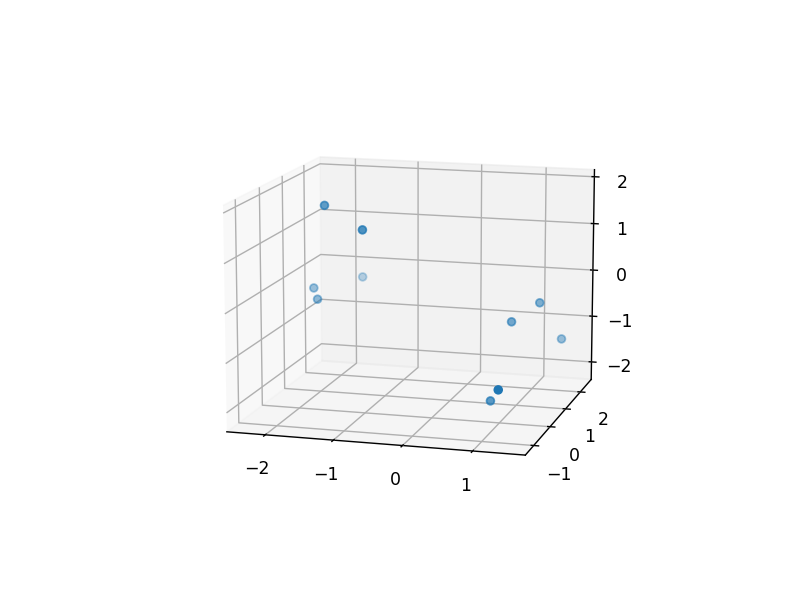

In [34]:
from matplotlib import pyplot as plt
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
# for i in range(len(rots)):
#     ax.plot(rots[i], rots[i,1], rots[i,2])
ax.scatter(np.array(rots)[:,0], np.array(rots)[:,1], np.array(rots)[:,2])